<a href="https://colab.research.google.com/github/Oskarino/Lab3_PTD/blob/main/Lab3_PTD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
from functools import partial
import math
from math import sin, cos, pi, sqrt, log
from scipy.fft import fft
import time

In [12]:
#czestotliwosc probkowania
f_s = 8000
#przesuniecie w fazie
phi = pi/120

#funkcja pomocnaicza dla skali decybelowej
def table_log(seq):
  return [log(el,10) for el in seq] 


def generate_signal(funkcja, f_s, T):
  ''' Funkcja generujaca sygnal dla funkcji: funkcja, czestotliwosci: f_s i czasu trwania T'''
  return [funkcja(n/f_s) for n in range(int(T*f_s))]


def widmo_amplitudowe(X):
  '''Obliczamy widno amplitudowe dla ciagu X'''
  return [ sqrt(X[k].real**2 + X[k].imag**2) for k in range(len(X))]

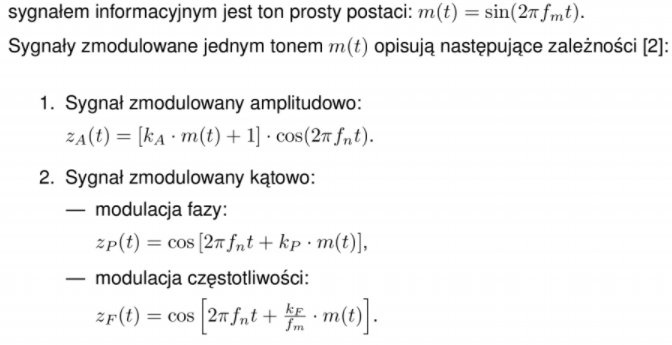

In [13]:
#czestotliwosc dla modulacji
f_m = 200
#czas
T = 2
#ton prosty m
funkcja_m = lambda t: sin(2*pi*f_m*t)
m = generate_signal(funkcja_m, f_m, T)

In [14]:
def modulacja_amplitudowa(funkcja, f_n, K_a):
  '''Funkcja modulujaca sygnal amplitudowo dla funkcji: funkcja, czestotliwosci: f_n i parametru modulacji amplitudy: K_a'''
  return lambda t: (K_a*funkcja(t)+1)*cos(2*pi*f_n*t)

def modulacja_katowa_fazy(funkcja, f_n, K_p):
  '''Funkcja modulujaca sygnal katowo dla funkcji: funkcja, czestotliwosci: f_n i parametru modulacji fazy: K_p '''
  return lambda t: cos(2*pi*f_n*t + K_p*funkcja(t))

def modulacja_katowa_czestotliwosci(funkcja, f_n, K_f, f_m):
  '''Funkcja modulujaca sygnal katowo dla funkcji: funkcja, czestotliwosci: f_n i parametru modulacji czestotliwosci: K_f i czestotliowsci modulacji: f_m '''
  return lambda t: cos(2*pi*f_n*t + K_f*funkcja(t)/f_m)

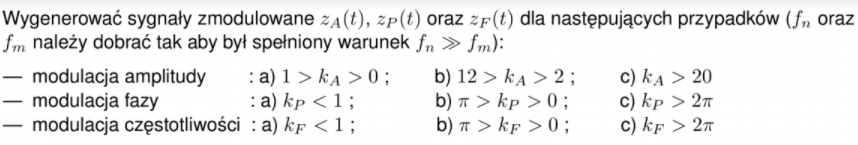

In [15]:
#czestotliwosc probkowania
f_n = 1000

#modulacja amplitudy
#a
K_a = 0.4
f_mod_amp_a = modulacja_amplitudowa(funkcja_m, f_n, K_a)
mod_amp_a = generate_signal(f_mod_amp_a, f_m, T)

#b
K_a = 11
f_mod_amp_b = modulacja_amplitudowa(funkcja_m, f_n, K_a)
mod_amp_b = generate_signal(f_mod_amp_b, f_m, T)

#c
K_a = 21
f_mod_amp_c = modulacja_amplitudowa(funkcja_m, f_n, K_a)
mod_amp_c = generate_signal(f_mod_amp_c, f_m, T)


#modulacja fazy
#a
K_p = 0.3
f_mod_kat_a = modulacja_katowa_fazy(funkcja_m, f_n, K_p)
mod_kat_a = generate_signal(f_mod_kat_a, f_m, T)

#b
K_p = 2
f_mod_kat_b = modulacja_katowa_fazy(funkcja_m, f_n, K_p)
mod_kat_b = generate_signal(f_mod_kat_b, f_m, T)


#c
K_p = 8
f_mod_kat_c = modulacja_katowa_fazy(funkcja_m, f_n, K_p)
mod_kat_c = generate_signal(f_mod_kat_c, f_m, T)


#modulacja czestotliwosci
#a
K_f = 0.3
f_mod_czest_a = modulacja_katowa_czestotliwosci(funkcja_m, f_n, K_f, f_m)
mod_czest_a = generate_signal(f_mod_czest_a, f_m, T)

#b
K_f = 2
f_mod_czest_b = modulacja_katowa_czestotliwosci(funkcja_m, f_n, K_f, f_m)
mod_czest_b = generate_signal(f_mod_czest_b, f_m, T)

#c
K_f = 8
f_mod_czest_c = modulacja_katowa_czestotliwosci(funkcja_m, f_n, K_f, f_m)
mod_czest_c = generate_signal(f_mod_czest_c, f_m, T)


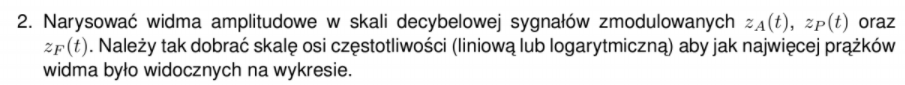

In [16]:
Widmo_mod_amp_a

[400.0000000000016,
 5.090365956489561e-13,
 4.606758294774279e-13,
 7.22480369641189e-13,
 5.707019021595526e-13,
 2.892280168048981e-13,
 2.172315382048203e-13,
 7.775019442067388e-13,
 9.192280439588332e-13,
 2.333078835823378e-13,
 2.690726179246507e-13,
 3.2929642218509814e-13,
 4.290273685884474e-13,
 1.2813244567674039e-12,
 2.1363126904351797e-13,
 2.324590378111515e-12,
 1.524389030101407e-12,
 1.4894342583474076e-12,
 1.1967159247309446e-12,
 2.1353776111532627e-13,
 6.532931805221973e-13,
 7.626637486735932e-13,
 1.9137680840184494e-13,
 4.2572079397160325e-13,
 8.550470546435928e-13,
 1.3194505850527342e-12,
 1.840781675536979e-12,
 1.765181354136959e-12,
 1.3981070508904584e-12,
 1.3857928626255807e-12,
 2.1467815380779107e-13,
 5.918694493104548e-13,
 1.4491821829970993e-12,
 9.187650484856998e-13,
 3.152408218577157e-13,
 5.146040010438914e-13,
 4.114852092811752e-13,
 3.728509116054066e-13,
 3.4583655418628524e-13,
 1.177695622297012e-13,
 8.129509934471053e-13,
 3.7572

Text(0.5, -0.21, 'Widmo amplitudowe sygnalu zmodulowanego amplitudowo K_a=0.4 [skala logarytmiczna]')

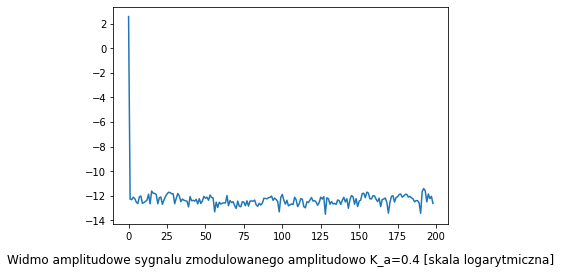

In [17]:
#dlugosc sygnalu
N = len(mod_czest_a)

#widmo amplitudowe
Widmo_mod_amp_a = widmo_amplitudowe(fft(mod_amp_a)[:int(N/2 - 1)])
plt.plot(range(int(N/2 - 1)), table_log(Widmo_mod_amp_a))
plt.title("Widmo amplitudowe sygnalu zmodulowanego amplitudowo K_a=0.4 [skala logarytmiczna]", y=-.21)

Text(0.5, -0.21, 'Widmo amplitudowe sygnalu zmodulowanego amplitudowo K_a=11')

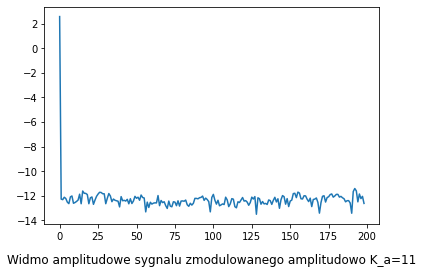

In [18]:
Widmo_mod_amp_b = widmo_amplitudowe(fft(mod_amp_b)[:int(N/2 - 1)])
plt.plot(range(int(N/2 - 1)), table_log(Widmo_mod_amp_a))
plt.title("Widmo amplitudowe sygnalu zmodulowanego amplitudowo K_a=11", y=-.21)

Text(0.5, -0.21, 'Widmo amplitudowe sygnalu zmodulowanego amplitudowo K_a=21')

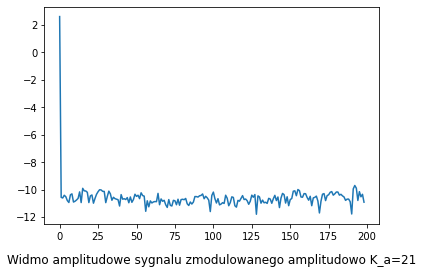

In [19]:
Widmo_mod_amp_c = widmo_amplitudowe(fft(mod_amp_c)[:int(N/2 - 1)])
plt.plot(range(int(N/2 - 1)), table_log(Widmo_mod_amp_c))
plt.title("Widmo amplitudowe sygnalu zmodulowanego amplitudowo K_a=21", y=-.21)

Text(0.5, -0.21, 'Widmo amplitudowe sygnalu zmodulowanego fazowo K_a=0.3 ')

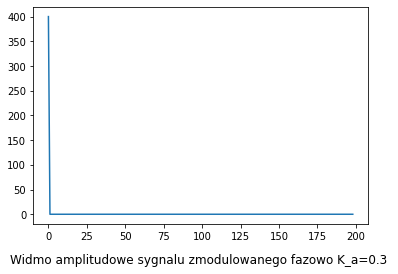

In [20]:
Widmo_mod_kat_a = widmo_amplitudowe(fft(mod_kat_a)[:int(N/2 - 1)])
plt.plot(range(int(N/2 - 1)), Widmo_mod_kat_a)
plt.title("Widmo amplitudowe sygnalu zmodulowanego fazowo K_a=0.3 ", y=-.21)

Text(0.5, -0.21, 'Widmo amplitudowe sygnalu zmodulowanego fazowo K_a=2')

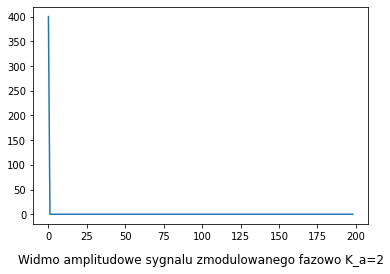

In [21]:
Widmo_mod_kat_b = widmo_amplitudowe(fft(mod_kat_b)[:int(N/2 - 1)])
plt.plot(range(int(N/2 - 1)), Widmo_mod_kat_b)
plt.title("Widmo amplitudowe sygnalu zmodulowanego fazowo K_a=2", y=-.21)

Text(0.5, -0.21, 'Widmo amplitudowe sygnalu zmodulowanego fazowo K_a=8')

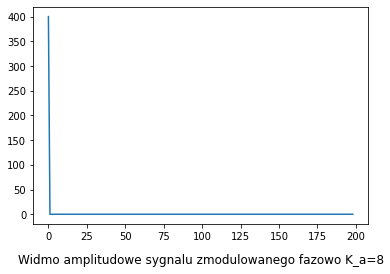

In [22]:
Widmo_mod_kat_c = widmo_amplitudowe(fft(mod_kat_c)[:int(N/2 - 1)])
plt.plot(range(int(N/2 - 1)), Widmo_mod_kat_c)
plt.title("Widmo amplitudowe sygnalu zmodulowanego fazowo K_a=8", y=-.21)

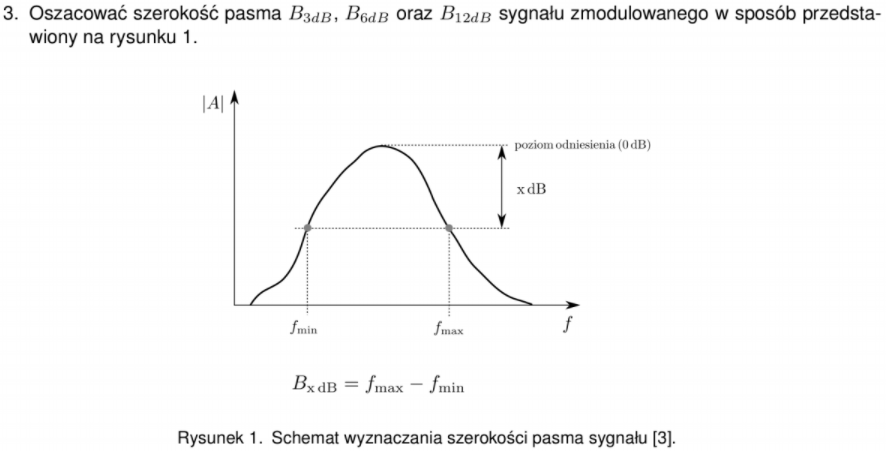

In [23]:
def szerokosc_pasma(czestotliowosc, amplituda, x):
  ''' Oblicza szerokosc pasma Bxdb dla sygnalu (czestotliowsc, amplituda) unimodalnego. Funkcja zaklada, ze istnieje dokladnie jeden punkt przeciecia'''
  if x == 3:
    poziom = 0.707
  elif x == 6:
    poziom = 0.5
  elif x == 12:
    poziom = 0.25
  else:
    raise Exception

  #skalowanie amplitudy
  max_amplitudy = max(amplituda)
  #indeks maksymalnego elementu 
  index = amplituda.index(max_amplitudy)
  #przeskalowana amplituda i przesunieta o poziom
  scaled_amplituda =  [abs(amp/max_amplitudy - poziom) for amp in amplituda]
  #lewa czesc wykresu - przed maksimum
  scaled_left = scaled_amplituda[:index]
  #prawa czesc wykresu - przed maksimum
  scaled_right = scaled_amplituda[index+1:]
  #f_min
  scaled_left_min = min(scaled_left)
  f_min = scaled_left.index(scaled_left_min)

  #f_max
  scaled_right_min = min(scaled_right)
  f_max = scaled_right.index(scaled_right_min) + index

  return f_max - f_min


In [24]:
xs = range(100)
ys = [-abs(x-50) + 50 for x in xs]

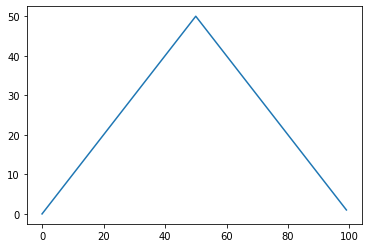

In [25]:
plt.plot(xs,ys)

In [26]:
szerokosc_pasma(xs, ys, 3)

29

In [27]:
szerokosc_pasma(xs, ys, 6)

49

In [28]:
szerokosc_pasma(xs, ys, 12)

74